# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

**In this project I have worked on a deep learning model based on LeNet architecture by Yan LeCun to classify german traffic signs using the dataset [German Traffic Signs Dataset "GTSRB"](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) .**

**Then I have tested the model on seven german traffic sign images downloaded from the internet.**

** In the following I will be explaining each part of the project**

---
## Project Pipeline Stepts:

**Step 0:** Load The data

**Step 1:** Dataset Summary & Exploration
  * Provide a basic summary of the dataset
  * Explatory visualization
    * Plotting 50 random samples of the dataset with their class id (label)
    * Plotting the histogram of classes and their frequencies in the dataset
    
**Step 2:** Design and Test a Model Architeture
  * Pre-processing of the dataset
    * Grayscaling
    * Normalization
    * Visualization of pre-processed data
  * Shuffle the dataset
  * Model Architecure
    * Setting the `EPOCHS` and `BATCH_SIZE`
    * Make use of the LeNet Architecture **with adding dropout for the fully connected layers**
    * Setting the features, labels, and dropout probability as tensorflow placeholders
    * Setting the learning rate, calculating cross-entropy, minimizing cross-entropy
    * Training the model
    * Evaluate the model using its validation set
  * After tweaking the whole hyper-parameter and taking the decision, testing the model using the test set
    
**Step 3:** Test the Model on New Images
  * Load the test images
  * Test images summary
  * Visualize the test images
  * Pre-process the test images
    * Grayscaling
    * Normalization
    * Visualization of pre-processed data
    * Test the model on the new images
  * Output the Top 5 Softmax Probabilities for Each Image of Test Images
  * Visualizing the predicted images accuracies in connection with the original test images

## Environment:
* AWS carnd Instance
* Python 3.6.4
* Anaconda 4.4.10

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file   = 'train.p'
validation_file = 'valid.p'
testing_file    = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES** 

### Provide a Basic Summary of the Dataset

In [2]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_train)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Import packages for the whole visualization cells

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import os
# Visualizations will be shown in the notebook.
%matplotlib inline

#### Plotting 50 random samples of the dataset with their class id (label)

Visualize the German Traffic Signs Dataset using the pickled file(s).

Here, I have plotted 50 random samples of the dataset

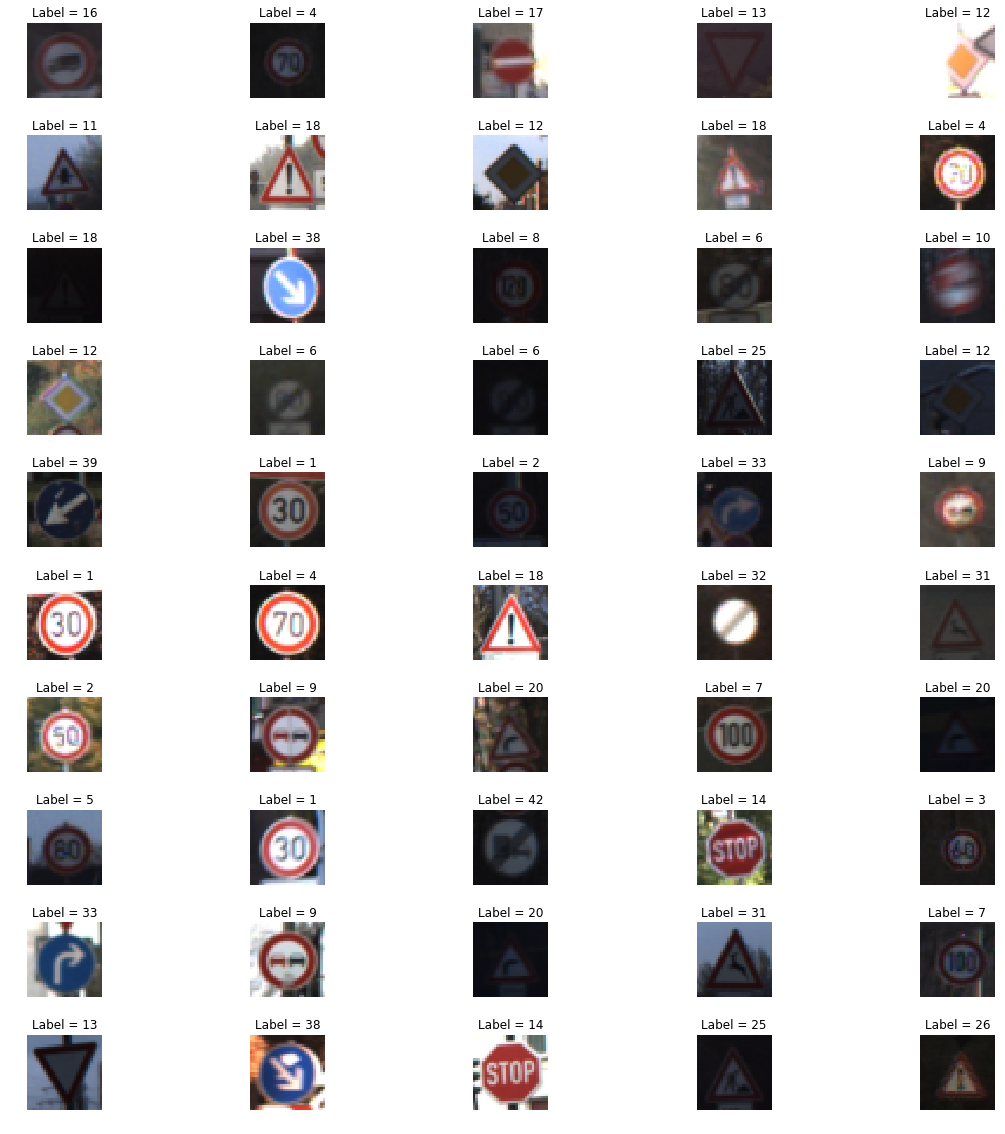

In [4]:
# Show image of 50 random data points
num_of_rows = 10
num_of_cols = 5
image_size = 20

fig, axs = plt.subplots(num_of_rows,num_of_cols, figsize=(image_size, image_size))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel() # flattening the axs 
for i in range(num_of_rows * num_of_cols):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title("Label = "+str(y_train[index]))

#### Plotting the histogram of classes and their frequencies in the dataset

Plotting a histogram for the classes ids (labels) frequencies through our dataset 
(i.e., how many times a definite class exists in our dataset).
This step is useful to check the distribution of our classes. This step _may_ lead to data augmentation if some of 
the classes exist in very low frequecny comparing to other ones

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


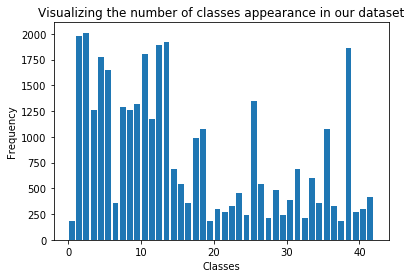

In [5]:
# Histogram for the classes ids frequency
bins = [x for x in range(n_classes)]
y = y_train

#print('bins' , bins)
#print('y_train', y_train)

# plt.bar(x, y, label='Bars1')
plt.hist(y, bins, histtype='bar', rwidth = 0.8)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Visualizing the number of classes appearance in our dataset')
plt.legend()
plt.show()

> It is worth to mention that the histogram really shows low frequenceis for some classses but I have delayed the step of data augmentation till checking the accuracy for my model
with the dataset at it is

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

Having a copy the original Training set, Validation set, and Test set before any pre-processing

In [6]:
original_X_train = X_train
original_X_valid = X_valid
original_X_test  = X_test

### Pre-process the Dataset (grayscaling and normalization)

#### Grayscaling
Grayscaling the dataset (Training set, Validation set, and Test set). In somecases, it is more convientient 
for the model to feed single channel (grayscaled) images rather than 3-channels (Colored, e.g. RGB) images

> It is worth to mention that whenever using the openCV function cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) you have to take care of two things:
  * whether the images are read in RGB or BGR or even other color space.
  * The cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) return an image without the channel dimension. So, for our coding below we will need this dimension, so you have to reshape the image to the proper dimension.

That is why I prefered to use the following way for grayscaling using NumPy, for each image, divide channel pixels by 3, then summing them together with keeping the dimension of the number of channels.

In [7]:
# Convert X_train, X_valid, and X_test to grayscale
gray_scale_X_train = np.sum(X_train/3, axis=3, keepdims=True)
gray_scale_X_valid = np.sum(X_valid/3, axis=3, keepdims=True)
gray_scale_X_test = np.sum(X_test/3, axis=3, keepdims=True)

In [8]:
# Make sure that we did not lose the 1-channel dimension after conversion to grayscale for X_train, X_valid, and X_test
print("gray_scale_X_train Image Shape: {}".format(gray_scale_X_train[0].shape))
print("gray_scale_X_valid Image Shape: {}".format(gray_scale_X_valid[0].shape))
print("gray_scale_X_test Image Shape: {}".format(gray_scale_X_test[0].shape))

    
print("gray_scale_X_train shape:", gray_scale_X_train.shape)
print("gray_scale_X_valid shape:", gray_scale_X_valid.shape)
print("gray_scale_X_test shape:", gray_scale_X_test.shape)

gray_scale_X_train Image Shape: (32, 32, 1)
gray_scale_X_valid Image Shape: (32, 32, 1)
gray_scale_X_test Image Shape: (32, 32, 1)
gray_scale_X_train shape: (34799, 32, 32, 1)
gray_scale_X_valid shape: (4410, 32, 32, 1)
gray_scale_X_test shape: (12630, 32, 32, 1)


Visualizing 32 random data points in RGB and its correspoding grayscale beside it (i.e., total 64 images)

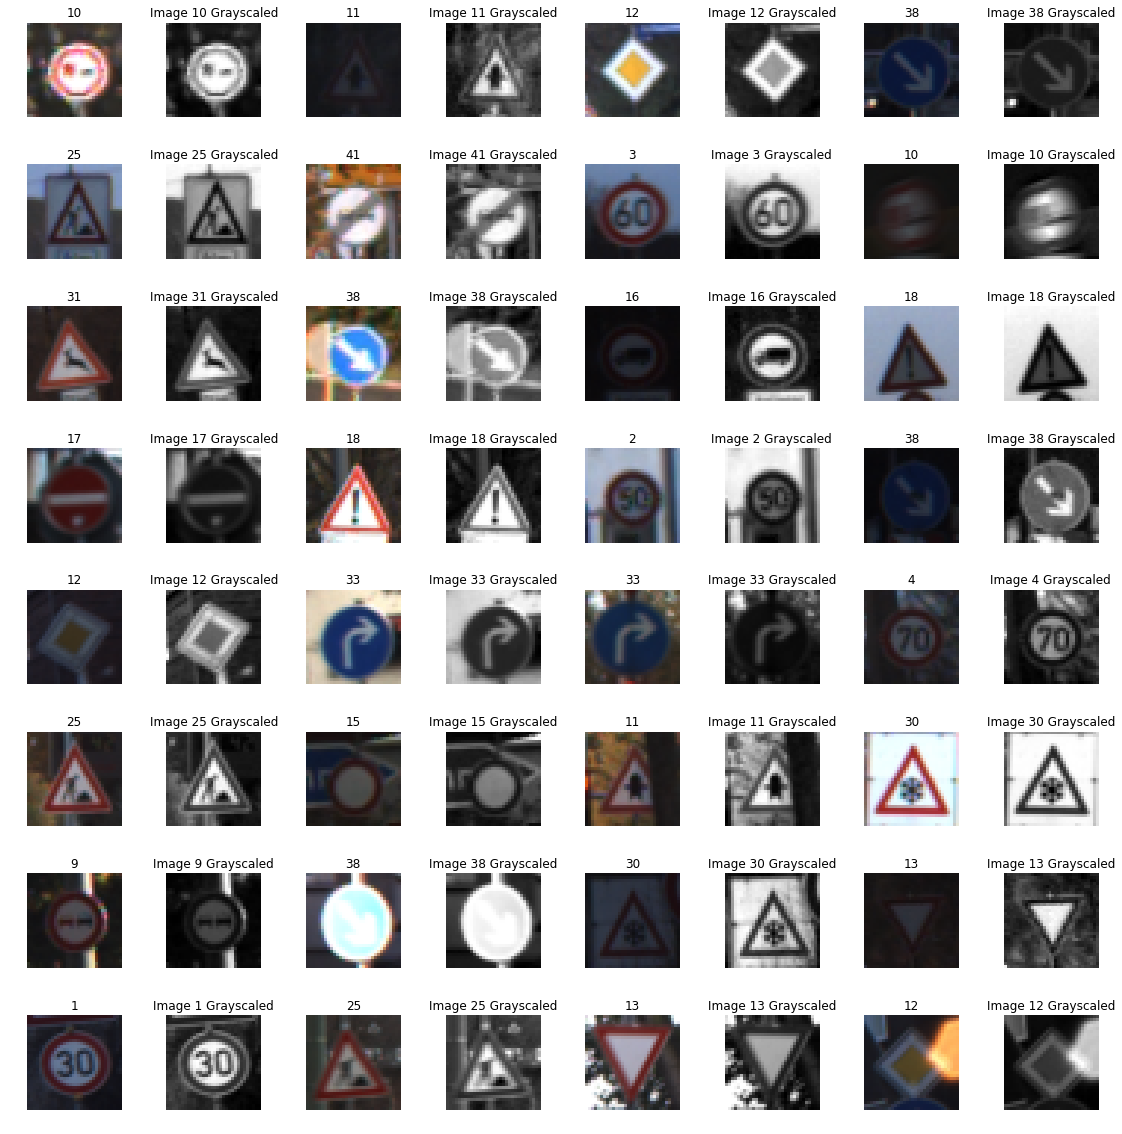

In [9]:
num_of_rows = 8
num_of_cols = 8
image_size = 20

fig, axs = plt.subplots(num_of_rows, num_of_cols, figsize=(image_size, image_size))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(num_of_rows * num_of_cols):
    if i % 2 == 0:
        index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i].set_title(y_train[index])
    else:
        image = gray_scale_X_train[index].squeeze()
        axs[i].axis('off')
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title("Image "+str(y_train[index])+" Grayscaled")

In [10]:
# make the original X_train, X_valid, and X_test variables in grayscale
X_train = gray_scale_X_train
X_valid = gray_scale_X_valid
X_test  = gray_scale_X_test

#### Normalization
The dataset (Training set, Validation set, and Test set) are normalized so that the data has mean zero and equal variance. 

For image data, `(pixel - 128)/ 128`

In [11]:
# Check the mean of X_train, X_valid, and X_test
print(np.mean(X_train))
print(np.mean(X_valid))
print(np.mean(X_test))

82.677589037
83.5564273756
82.1484603612


In [12]:
# Normalize the dataset
X_train_normalized = (X_train - 128) / 128
X_valid_normalized = (X_valid - 128) / 128
X_test_normalized  = (X_test  - 128) / 128 

#Print the mean after normalization to check the difference
print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))
print(np.mean(X_test_normalized))

-0.354081335648
-0.347215411128
-0.358215153428


Visualizing 32 random data points in grayscale and its correspoding normalized image
beside it (i.e., total 64 images)

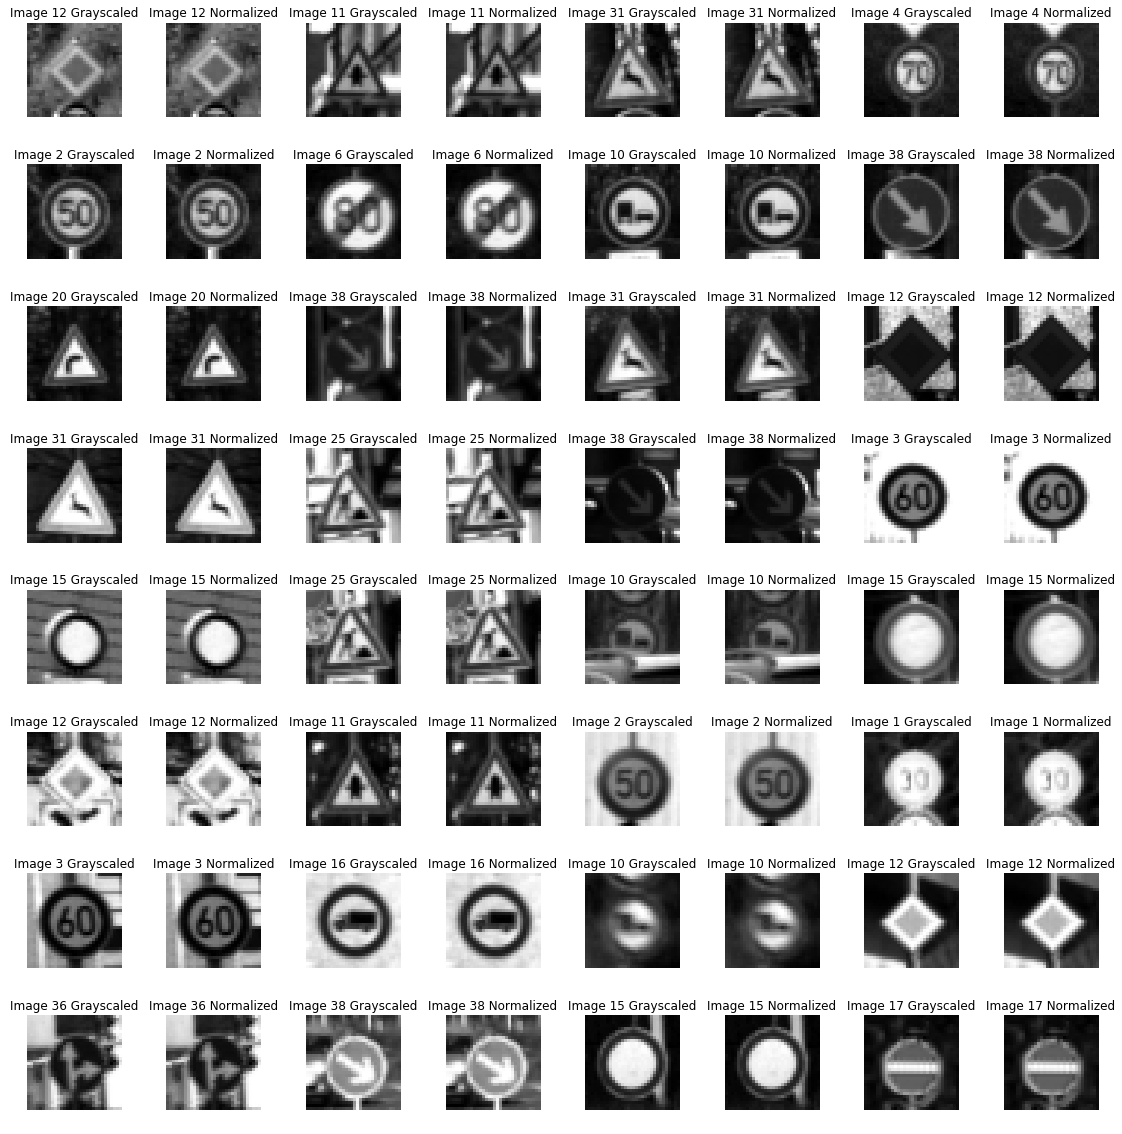

In [13]:
num_of_rows = 8
num_of_cols = 8
image_size = 20

fig, axs = plt.subplots(num_of_rows,num_of_cols, figsize=(image_size, image_size))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(num_of_rows * num_of_cols):
    if i % 2 == 0:
        index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()
        axs[i].axis('off')
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title("Image "+str(y_train[index])+" Grayscaled")
    else:
        image = X_train_normalized[index].squeeze()
        axs[i].axis('off')
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title("Image "+str(y_train[index])+" Normalized")

Now, we are ready to take our dataset (Training set, Validation set, and Test set) into our model

In [14]:
# Make the X_train, X_valid, and X_test normalized
X_train = X_train_normalized
X_valid = X_valid_normalized
X_test  = X_test_normalized

### Shuffle the training set

Here, we shuffle the training set in order not to make the model biased by the order of images

In [15]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

#### EPOCHS and BATCH_SIZE

The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

Here I have chosen the `EPOCHS` to be 100 and the `BATCH_SIZE` to be 128

In [16]:
EPOCHS = 100
BATCH_SIZE = 128

#### Model Architecture Description

Here, I made use of the LeNet Architecture by Yan LeCun that is shown below ** with adding dropout for the fully connected layers**.

![LeNet Architecture](lenet.png)

Here I will explain the model input, a brief at each layer mentioning the dimenions of each one


### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since our images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** ReLU activation function

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation: ** ReLU activation function

**Pooling: ** The output shape should be 5x5x16.

**Flatten: ** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation: ** ReLU activation function.

** Dropout: ** A dropout is used in order to pretent our model to memorize the training set. We get consensus opinion by averaging the activations (I used a dropout of 0.5).

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation: ** ReLU activation function.

** Dropout: ** A dropout is used in order to pretent our model to memorize the training set. We get consensus opinion by averaging the activations (I used a dropout of 0.5)

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the logits

In [17]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') #+ conv1_b
    conv1   = tf.nn.bias_add(conv1, conv1_b)

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')#+ conv2_b
    conv2   = tf.nn.bias_add(conv2, conv2_b)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.add(tf.matmul(fc0, fc1_W) , fc1_b)
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout.
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.add(tf.matmul(fc1, fc2_W) , fc2_b)
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout.
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, fc3_W) , fc3_b)
    
    return logits

#### Features, Labels,  and dropout probability

`x` is a placeholder for a batch of input images.

`y` is a placeholder for a batch of output labels.

`one_hot_y` is a placeholder for labels in one-hot-encoded format

`keep_prob` is a placeholder for keeping the number of activations

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

#### Setting the learning rate, calculating cross-entropy, minimizing cross-entropy

In [19]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

##### A function for evaluating the model
Evaluate how well the loss and accuracy of the model for a given dataset.

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.634

EPOCH 2 ...
Validation Accuracy = 0.800

EPOCH 3 ...
Validation Accuracy = 0.868

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 5 ...
Validation Accuracy = 0.905

EPOCH 6 ...
Validation Accuracy = 0.916

EPOCH 7 ...
Validation Accuracy = 0.928

EPOCH 8 ...
Validation Accuracy = 0.943

EPOCH 9 ...
Validation Accuracy = 0.945

EPOCH 10 ...
Validation Accuracy = 0.945

EPOCH 11 ...
Validation Accuracy = 0.948

EPOCH 12 ...
Validation Accuracy = 0.953

EPOCH 13 ...
Validation Accuracy = 0.959

EPOCH 14 ...
Validation Accuracy = 0.957

EPOCH 15 ...
Validation Accuracy = 0.954

EPOCH 16 ...
Validation Accuracy = 0.954

EPOCH 17 ...
Validation Accuracy = 0.961

EPOCH 18 ...
Validation Accuracy = 0.959

EPOCH 19 ...
Validation Accuracy = 0.965

EPOCH 20 ...
Validation Accuracy = 0.966

EPOCH 21 ...
Validation Accuracy = 0.965

EPOCH 22 ...
Validation Accuracy = 0.962

EPOCH 23 ...
Validation Accuracy = 0.967

EPOCH 24 ...
Validation Accura

### Evaluate the Model
After tweaking the whole hyper-parameter and taking the decision for the model, testing the model using the test set

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.951


---

## Step 3: Test a Model on New Images

Testing our model on seven images for german traffic signs

### Load and Output the Images

In [23]:
images_list = os.listdir("Test_Images_From_Internet/")
print(images_list)
test_images = []
for img in images_list:
    if not img.startswith('.'): # To ignore the hidden files
        image = cv2.imread("Test_Images_From_Internet/"+img)
        image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        test_images.append(image)
        
test_images = np.asarray(test_images)

['8.png', '2.png', '3.png', '6.png', '1.png', '5.png', '9.png']


### Test Images Summary

In [24]:
print("Test Images Set Shape" , test_images.shape)
print("Test Image Shape" ,test_images[0].shape)
print("Number of Exaples or Classes in Test Images Set", len(test_images))

Test Images Set Shape (7, 32, 32, 3)
Test Image Shape (32, 32, 3)
Number of Exaples or Classes in Test Images Set 7


### Visualize the Test Images

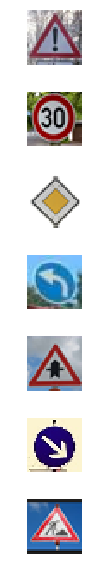

In [25]:
# show image of the test images
num_of_rows = len(test_images)
num_of_cols = 1
image_size = 10

fig, axs = plt.subplots(num_of_rows,num_of_cols, figsize=(image_size, image_size))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel() # flattening the axs 
for i in range(num_of_rows * num_of_cols):
    image = test_images[i]
    axs[i].axis('off')
    axs[i].imshow(image)

### Pre-precessing of test images

#### Grayscaling

In [26]:
gray_scale_test_images = np.sum(test_images/3, axis=3, keepdims=True)

print(gray_scale_test_images.shape)
print(gray_scale_test_images[0].shape)

(7, 32, 32, 1)
(32, 32, 1)


Visualize the test images RGB and its correspoding grayscale beside it 

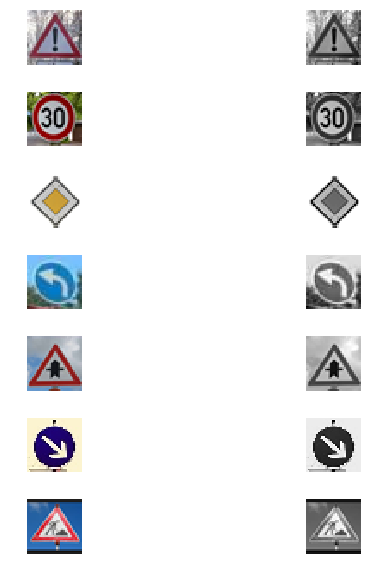

In [27]:
num_of_rows = len(test_images)
num_of_cols = 2
image_size = 10
index = -1

fig, axs = plt.subplots(num_of_rows,num_of_cols, figsize=(image_size, image_size))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(num_of_rows):
    index = index + 1

    image = test_images[i]
    axs[index].axis('off')
    axs[index].imshow(image)

    index = index + 1
    image = gray_scale_test_images[i].squeeze()
    axs[index].axis('off')
    axs[index].imshow(image, cmap='gray')

#### Normalization

In [28]:
print(np.mean(gray_scale_test_images))
normalized_test_images = (gray_scale_test_images - 128) / 128
print(np.mean(normalized_test_images))

143.386114211
0.120204017276


Visualize the test images grayscale and its correspoding notmalized images beside it 

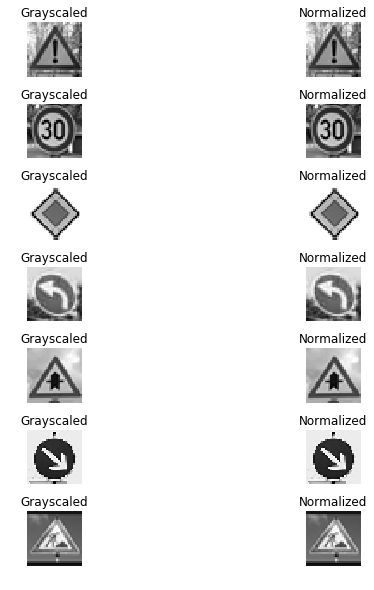

In [29]:
num_of_rows = len(test_images)
num_of_cols = 2
image_size = 10
index = -1

fig, axs = plt.subplots(num_of_rows, num_of_cols, figsize=(image_size, image_size))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(num_of_rows):
    index = index + 1

    image = gray_scale_test_images[i].squeeze()
    axs[index].axis('off')
    axs[index].imshow(image, cmap='gray')
    axs[index].set_title("Grayscaled")

    index = index + 1
    image = normalized_test_images[i].squeeze()
    axs[index].axis('off')
    axs[index].imshow(image, cmap='gray')
    axs[index].set_title("Normalized")

In [30]:
test_data = normalized_test_images
test_labels = [18, 1, 12, 34, 11, 38, 25]

### Predict the Sign Type for Each Image

In [31]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_data, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Analyze Performance

The model is capable of predicting the correct lebels for the seven test images

> It is worth to mention that the model is impacted by the quality of the test image. Here, there images are 
well-resized and well-scaled.
If the test images are distorted, the model will fail in some test cases.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
softmax = tf.nn.softmax(logits)
top_fiv = tf.nn.top_k(softmax, k=5)
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = sess.run(top_fiv, feed_dict={x: test_data, keep_prob: 1.0})
    values = output.values
    indices = output.indices
    print(output)  

TopKV2(values=array([[  1.00000000e+00,   5.20771891e-24,   2.05994302e-24,
          2.00351422e-33,   3.65204031e-34],
       [  1.00000000e+00,   8.42949774e-14,   8.27058555e-15,
          3.10022148e-15,   3.09608037e-18],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.96947557e-14,   4.14838145e-22,
          9.39376453e-25,   1.41994547e-26],
       [  1.00000000e+00,   2.19063547e-29,   3.81288614e-30,
          6.54751153e-31,   3.64199581e-34],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.99998808e-01,   1.22132747e-06,   1.73590486e-09,
          1.69902092e-09,   7.77618421e-12]], dtype=float32), indices=array([[18, 26, 37, 27, 25],
       [ 1,  2, 13, 14,  4],
       [12,  0,  1,  2,  3],
       [34, 38, 32, 17, 35],
       [11, 30, 12, 21, 42],
       [38,  0,  1,  2,  3],
       [25, 20, 18, 30, 11]], dtype=in

### Visualize the Test Images with the Top 5 Softmax Probabilities

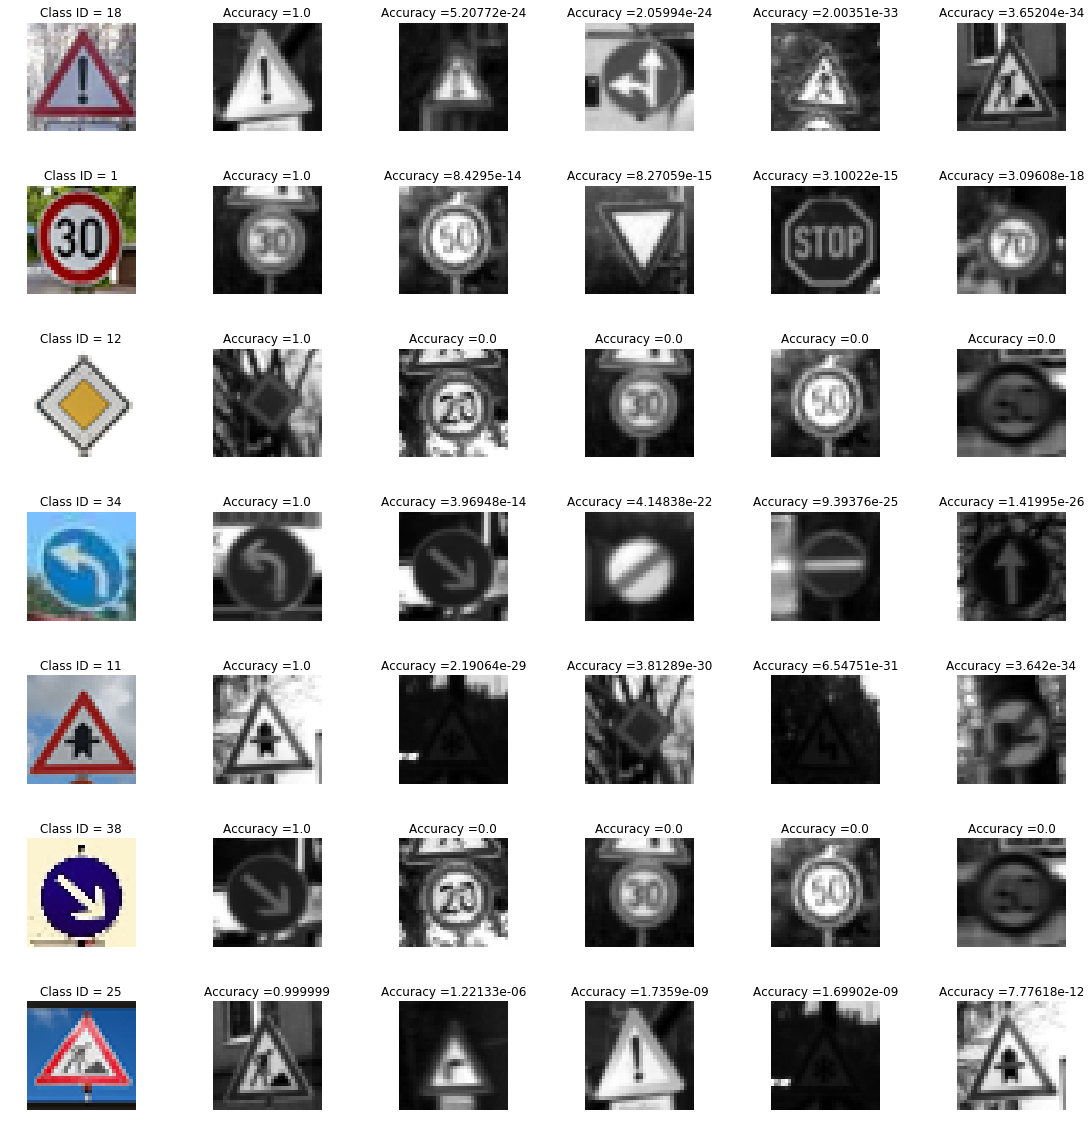

In [34]:
num_of_rows = len(test_data)
num_of_cols = 6
image_size = 20


fig, axs = plt.subplots(num_of_rows, num_of_cols, figsize=(image_size, image_size))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
index = 0
j = -1
predicted_image_index = 0
predicted_labes = []
predicted_labes = np.array(predicted_labes)
predicted_accuracy = []
predicted_accuracy = np.array(predicted_accuracy)
for i in range(num_of_rows * num_of_cols):
    if(i%6 == 0): # The original test data
        index = int(i/6)
        #print('Index is ',index)
        #print("I is " ,i)
        image = test_images[index].squeeze()
        predicted_labes = indices[index]
        predicted_accuracy = values[index]
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i].set_title("Class ID = "+str(test_labels[index]))
        j = -1
    else:
        j = j+1
        #print("J = " , j)
        if(j>4):
            print("ERRROR ERRROR ERRROR ERRROR ERRROR")
        prediction = predicted_labes[j]
        acc = predicted_accuracy[j]
        
        for counter in range(len(y_test)):
            if(y_train[counter] == prediction):
                predicted_image_index = counter
                #print("Prediction is = " ,prediction)
                break
        image = X_train[predicted_image_index].squeeze()
        axs[i].axis('off') 
        axs[i].imshow(image, cmap='gray')
        axs[i].set_title("Accuracy =" +str(acc))        